# Predicting Newsletter Subscription with KNN Classification using Age and Experience Level

## Introduction
Video games are widely being used for the study of human behaviour and decision making. In this project we are using data obtained from a [MineCraft Server](https://plai.cs.ubc.ca), collected by [The Pacific Laboratory for Artificial Intelligence (PLAI)](https://plai.cs.ubc.ca), a research team at UBC. The team needs to target their recruitment efforts, and make sure they have enough resources (e.g., software licenses, server hardware) to handle the number of players they attract. 

The players who join the server give consent for their in-game activities to be recorded for research purposes and have the opportunity to subscribe to a game related newsletter. The research team wants to know who is subscribing to the newsletter as subscribed players are easier to contact for future follow-up studies, improving the effectiveness of participant recruitment, and subscription behaviour may reflect a player's level of engagement with the research project, since more invested players may be more willing to remain connected and contribute additional data over time.


## Question

#### Broad question
What player characteristics and behaviours are most predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?

#### Specific question
The question we will be exploring is "Can a player's `experience` level, `Age`, predict whether they subscribe to the newsletter in the players dataset?"

We will use the `players.csv` dataset, which has 7 variables and 196 observations, describing general demographic information about each player logged on the server:

| Variable       | Description                             | Type                  |
| -------------- | --------------------------------------- | --------------------- |
| `experience`   | The player’s level of experience        | character              |
| `subscribe`    | The player’s subscription status to the game newsletter       | logical |
| `hashedEmail`  | The player’s unique identifier code     | character             |
| `played_hours` | The player’s total play time (in hours) | double             |
| `name`         | The player’s name                       | character             |
| `gender`       | The player’s gender                     | character             |
| `Age`          | The player’s age (in years)             | double              |

There are a few issues with the data:
- `experience`, `subscribe`, `gender`, are read in as the incorrect data type, they should be stored as categorical variables instead.
- `age` should be an integer.
- Variables such as `experience` and `age` are self-reported, which may introduce accuracies or inconsistencies.
- Most players are 17, which may lead to data imbalance as 17 is the default age on the survery. 

In this report we will utilise some of this information to address our specific question of what player characteristics predict newsletter subscription status. 

In this context, `subscribe` (TRUE/FALSE) is the response variable, while `experience` (Beginner, Amateur, Regular, Veteran, Pro) and `age` (in years) are the predictors that may influence subscription behaviour. By modelling these relationships, we can identify what types of players are more likely to subscribe based on their self-reported information.

We are observing the predictors `experience` and `Age`. A player's experience may reflect how comfortable or invested a player is in gaming. More experienced players might engage more consistently, feel more connected to the research environment, or be more willing to participate in follow-up studies. Age may influence play behaviour, availability, or motivation to engage with research content. Different age groups may show different subscription patterns depending on their interests or gaming habits.

## Methods and Results

We plan to use a K-Nearest Neighbors (KNN) classification model to predict whether a player will subscribe based on their age and experience.  
predictors: `Age` and `experience`  
response variable: `subscribe`
+ Firstly, I will load the packages that are necessary.
+ Then I'll use the URL to load the players dataset.
+ For the "wrangles and cleans the data" section, I'm going to select the required columns and filter out players with `played_hours` = 0, as these players may be inactive or may have registered for the game but never participated. What's more, I'll remove the missing values because they may impact the calculation.
+ For the "Data Preparation" section, I will apply One-Hot Encoding to convert `experience` into a numeric variable. I'l also convert `subscribe` into a factor variable. 

For the "Data analysis" section: 
+ I'll split the dataset into training and testing sets before modeling. Specifically, I will use 70% of the data for training and 30% for testing to evaluate model performance on unseen data.
+ Within the training data, I will apply 5-fold cross-validation to tune the value of K. In each fold, 80% of the training data will be used for training and 20% will be used as the validation set.
+ After running 5-fold cross-validation for each K value, I will look at the average accuracy of each model. The model with the highest average accuracy will be selected.
+ Finally, I'll use the best k to do a fix model and evaluate for accuracy, precision, and recall.



## 1. load required packages

In [1]:
library(tidyverse)
library(tidymodels)
library(kknn)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

## 2. load data

In [2]:
url = 'https://raw.githubusercontent.com/dod0bird/Dsci-Group-Project/refs/heads/main/players.csv'
players <- read_csv(url)
head(players)

Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,Age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17


## 3. wrangles and cleans the data 

In [3]:
players_new <- players |> 
mutate(experience = as_factor(experience),
       subscribe = as_factor(subscribe),
       Age = as.integer(Age)) |>
filter(played_hours > 0) |>
select(c(1,2,7)) 
head(players_new)

experience,subscribe,Age
<fct>,<fct>,<int>
Pro,TRUE,9
Veteran,TRUE,17
Amateur,TRUE,21
Regular,TRUE,21
Amateur,TRUE,47
Veteran,TRUE,23


In [4]:
players_new <- players_new |>
drop_na()
head(players_new)

experience,subscribe,Age
<fct>,<fct>,<int>
Pro,TRUE,9
Veteran,TRUE,17
Amateur,TRUE,21
Regular,TRUE,21
Amateur,TRUE,47
Veteran,TRUE,23


## 4. players dataset summary

In [5]:
experience_categories <- players_new |>
     distinct(experience)
experience_categories

experience
<fct>
Pro
Veteran
Amateur
Regular
Beginner


In [6]:
subscribe_levels <- players_new |>
     distinct(subscribe)
subscribe_levels

subscribe
<fct>
TRUE
FALSE


In [7]:
age_summary <- players_new |>
  summarize(age_mean = mean(Age, na.rm = TRUE),
            age_min = min(Age, na.rm = TRUE),
            age_max = max(Age, na.rm = TRUE),
            age_sd = sd(Age, na.rm = TRUE))
age_summary

age_mean,age_min,age_max,age_sd
<dbl>,<int>,<int>,<dbl>
21.30275,9,58,7.652771


In [8]:
dim(players_new)

[1] 109   3

### Players dataset overview:
+ number of observations: 109
+ number of variables: 3  

### The variables in players dataset are:
+ `experience` is a catagorical variable that records player's experience level in the game, such as `Pro`,`Veteran`, `Amateur`, `Regular`, and `Beginner`.
+ `subscribe` is a catagorical variable that indicates whether the players subscribed to a game-related newsletter, with `TRUE` meaning subscribed and `FALSE` meaning not subscribed.
+ `Age` is a integer variable that records the player's age in years. The mean `Age` is 21.30 years old, with a minimum of 9 years old, a maximum of 58 years old, and a standard deviation of 7.65 years old.

## 5. players dataset visualization

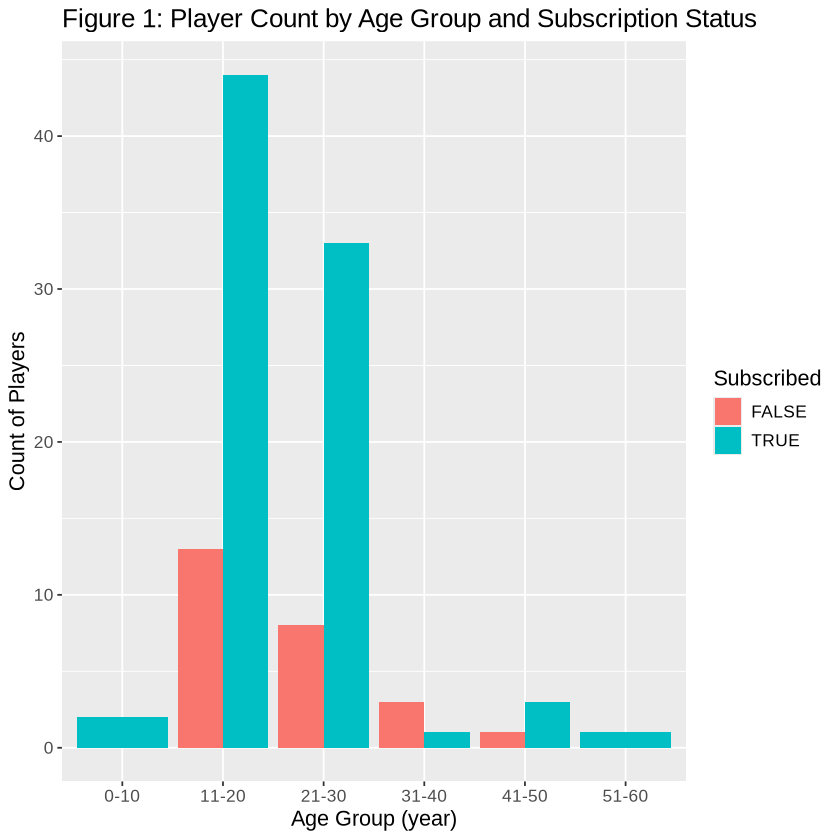

In [9]:
age_subscribe_bar <- players_new |>
  mutate(age_group = cut(Age, breaks = c(0, 10, 20, 30, 40, 50, 60),
                         labels = c("0-10", "11-20", "21-30", "31-40", "41-50", "51-60"))) |>
  ggplot(aes(x = age_group, fill = subscribe)) +
  geom_bar(position = "dodge") +
  labs(x = "Age Group (year)", y = "Count of Players",
       fill = "Subscribed",
       title = "Figure 1: Player Count by Age Group and Subscription Status")+
  theme(text = element_text(size=13))

age_subscribe_bar

Figure 1 shows that people between 11 and 30 years old subscribe the most compared to other age groups.

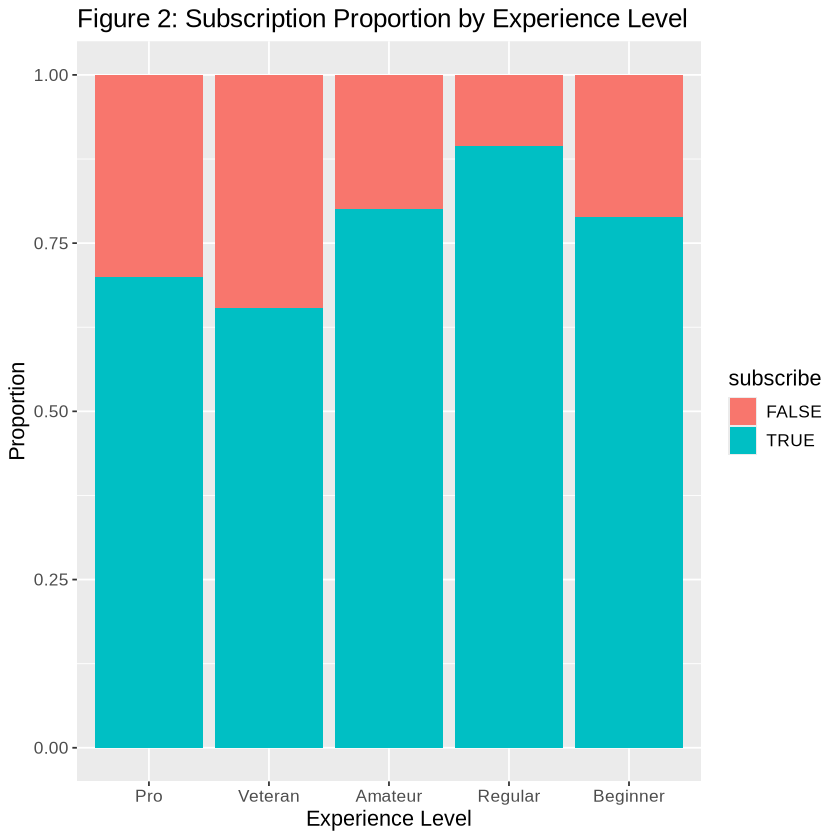

In [10]:
subscribe_experience_prop <- players_new |>
  ggplot(aes(x = experience, fill = subscribe)) +
  geom_bar(position = "fill") +
  xlab("Experience Level") +
  ylab("Proportion") +
  ggtitle("Figure 2: Subscription Proportion by Experience Level") +
  theme(text = element_text(size=13))
subscribe_experience_prop

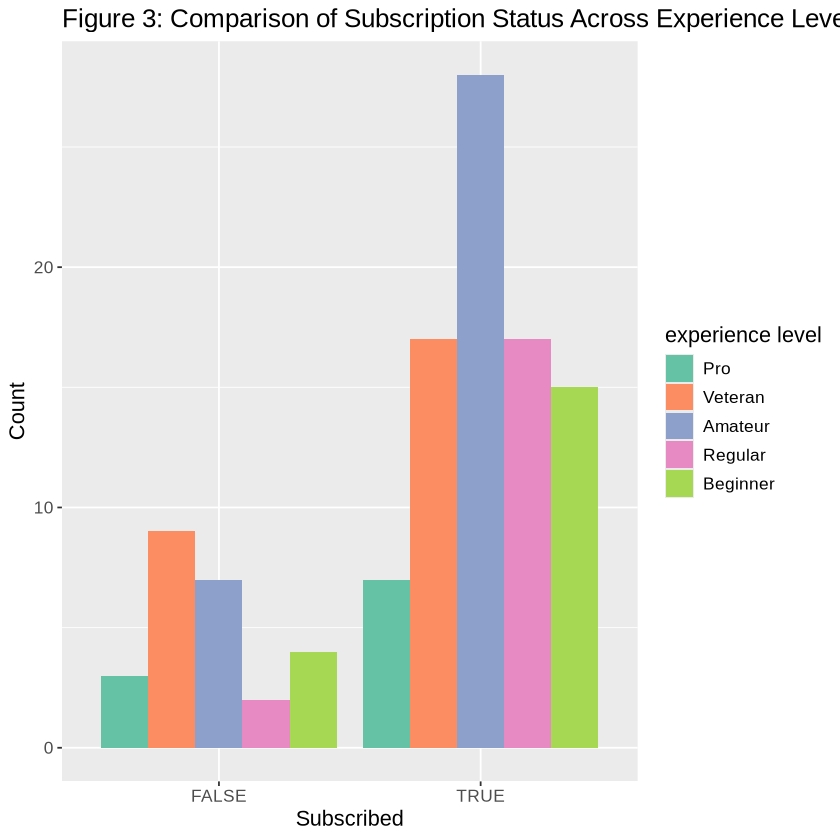

In [11]:
subscribe_experience <- ggplot(players_new, aes(x = subscribe)) + 
  geom_bar(aes(fill = experience), position = "dodge") +
  xlab("Subscribed") +
  ylab("Count") +
  scale_fill_brewer(palette = "Set2") +
  ggtitle("Figure 3: Comparison of Subscription Status Across Experience Levels") +
  labs(fill = "experience level") +
  theme(text = element_text(size=13))
subscribe_experience

Figure 2 shows that players at the Regular level have the highest subscription rate.Figure 3 above shows that experienced players (Veteran and Regular) have higher subscription proportions than Beginner and Pro players. It also shows that Amateur players make up most of the subscribers.

## 6. Data Preparation

In [12]:
# Apply One-Hot Encoding to convert experience into a numeric variable
encoded_experience <- model.matrix(~ experience - 1, data = players_new)

# Combine Age, subscribe, and the one-hot encoded experience variables
players_encoded <- players_new |>
  select(Age, subscribe, experience) |> 
  bind_cols(as_tibble(encoded_experience)) 
head(players_encoded)

Age,subscribe,experience,experiencePro,experienceVeteran,experienceAmateur,experienceRegular,experienceBeginner
<int>,<fct>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
9,TRUE,Pro,1,0,0,0,0
17,TRUE,Veteran,0,1,0,0,0
21,TRUE,Amateur,0,0,1,0,0
21,TRUE,Regular,0,0,0,1,0
47,TRUE,Amateur,0,0,1,0,0
23,TRUE,Veteran,0,1,0,0,0


In this part, I use one hot encoding to convert `experience` from a categorical variable to a numerical variable. These transformations ensure that both variables are in suitable formats for the subsequent classification modeling process.

In [13]:
dim(players_encoded)

[1] 109   8

### Players dataset overview after encoding:
+ number of observations: 109
+ number of variables: 7  

### The variables in players dataset after encoding are:
+ `experienceAmateur`, `experienceBeginner`, `experiencePro`, `experienceRegular`, and `experienceVeteran` are double variables. Each variable takes a value of 0 or 1, indicating whether the player's experience level is Amateur, Beginner, Pro, Regular, or Veteran respectively. 
+ `subscribe` is a factor variable now.
+ `Age` is still a double variable that records the player's age in years.
+ `experience` is a character variable that records player's experience level in the game, such as `Pro`,`Veteran`, `Amateur`, `Regular`, and `Beginner`.

## 7. Data analysis

In [55]:
# Split the dataset into training and testing sets
set.seed(7654)
players_split <- initial_split(players_encoded, prop = 0.70, strata = subscribe)
players_train <- training(players_split)
players_test  <- testing(players_split)

In [47]:
# Prepares and preprocesses the data (normalization & selecting predictors)
players_recipe <- recipe(subscribe ~ Age + experienceAmateur + experienceBeginner + experiencePro + experienceRegular + experienceVeteran, data = players_train) |>
  step_scale(all_predictors()) |>
  step_center(all_predictors()) 

players_recipe



── Recipe ──────────────────────────────────────────────────────────────────────



── Inputs 

Number of variables by role

outcome:   1
predictor: 6



── Operations 

• Scaling for: all_predictors()

• Centering for: all_predictors()



In [56]:
# Specify KNN clssification model with tunable neighbors
players_tune <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
  set_engine("kknn") |>
  set_mode("classification")
players_tune

K-Nearest Neighbor Model Specification (classification)

Main Arguments:
  neighbors = tune()
  weight_func = rectangular

Computational engine: kknn 


In [63]:
# Define candidate K values
players_kvalues <- tibble(neighbors = 1:25)

In [64]:
# Set up 5-fold cross-validation on training data
set.seed(7654)
players_vfold <- vfold_cv(players_train, v = 5, strata = subscribe)

In [65]:
# Create workflow and tune K using cross-validation
players_fit_tune <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_tune) |>
  tune_grid(resamples = players_vfold, grid = players_kvalues, control = control_grid(save_pred = TRUE))

In [66]:
# Collect accuracy results and identify best K
players_accuracy <- players_fit_tune |>
  collect_metrics() |>
  filter(.metric == "accuracy") |>
  arrange(desc(mean))
head(players_accuracy)

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7742857,5,0.03171642,Preprocessor1_Model06
9,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model09
10,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model10
13,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model13
14,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model14
15,accuracy,binary,0.7742857,5,0.01025193,Preprocessor1_Model15


In [67]:
# See accuracy stats with best K
best_kvalue_metrics <- players_accuracy |>
slice(1) 
best_kvalue_metrics

# Select the best K value based on accuracy
best_kvalue <- players_accuracy |>
slice(1) |> 
pull(neighbors)
best_kvalue

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
6,accuracy,binary,0.7742857,5,0.03171642,Preprocessor1_Model06


[1] 6

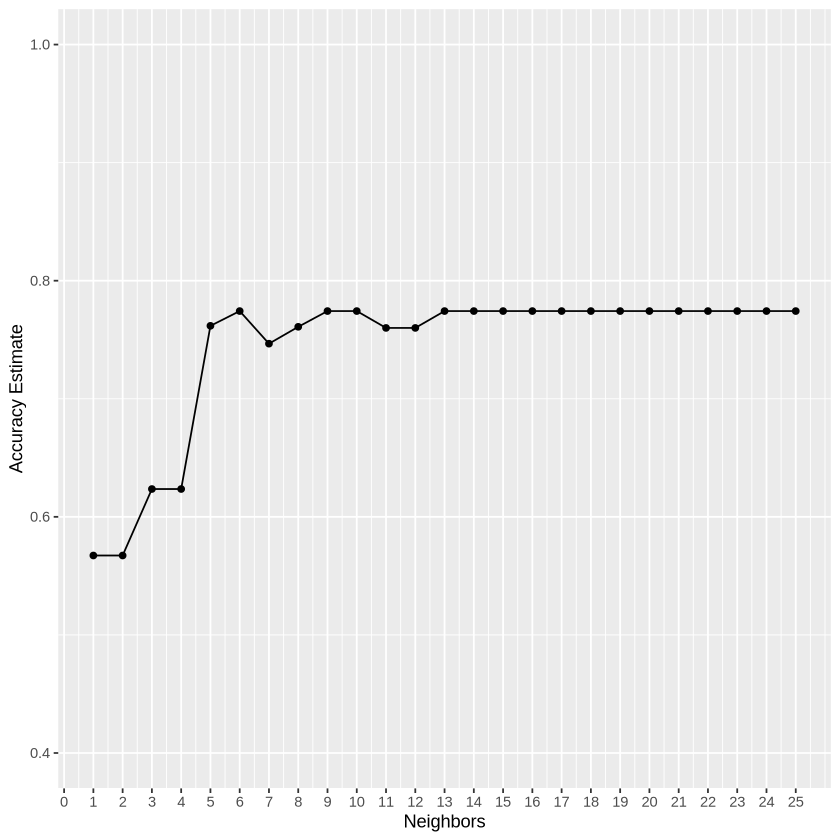

In [71]:

accuracy_versus_k <- ggplot(players_accuracy, aes(x = neighbors, y = mean))+
      geom_point() +
      geom_line() +
      labs(x = "Neighbors", y = "Accuracy Estimate") +
      scale_x_continuous(breaks = seq(0, 25, by = 1)) +  # adjusting the x-axis
      scale_y_continuous(limits = c(0.4, 1.0)) # adjusting the y-axis
accuracy_versus_k

In [72]:
# Train final KNN model using the best K
players_final_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = best_kvalue) |>
  set_engine("kknn") |>
  set_mode("classification")

players_workflow <- workflow() |>
  add_recipe(players_recipe) |>
  add_model(players_final_spec)

players_fit <- fit(players_workflow, data = players_train)

# explain why it plateaus due to the nature of our variablbes

In [23]:
# Evaluate final KNN classification model
players_predictions <- predict(players_fit, players_test) |>
  bind_cols(players_test)

# Accuracy
players_predictions |>
  metrics(truth = subscribe, estimate = .pred_class) |>
  filter(.metric == "accuracy")

# Precision
players_predictions |>
  precision(truth = subscribe, estimate = .pred_class, event_level = "second")

# Recall
players_predictions |>
  recall(truth = subscribe, estimate = .pred_class, event_level = "second")

players_confusion <- players_predictions |>
  conf_mat(truth = subscribe, estimate = .pred_class)
players_confusion

.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
accuracy,binary,0.7058824


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
precision,binary,0.8076923


.metric,.estimator,.estimate
<chr>,<chr>,<dbl>
recall,binary,0.8076923


          Truth
Prediction FALSE TRUE
     FALSE     3    5
     TRUE      5   21

## Visualization of the analysis 

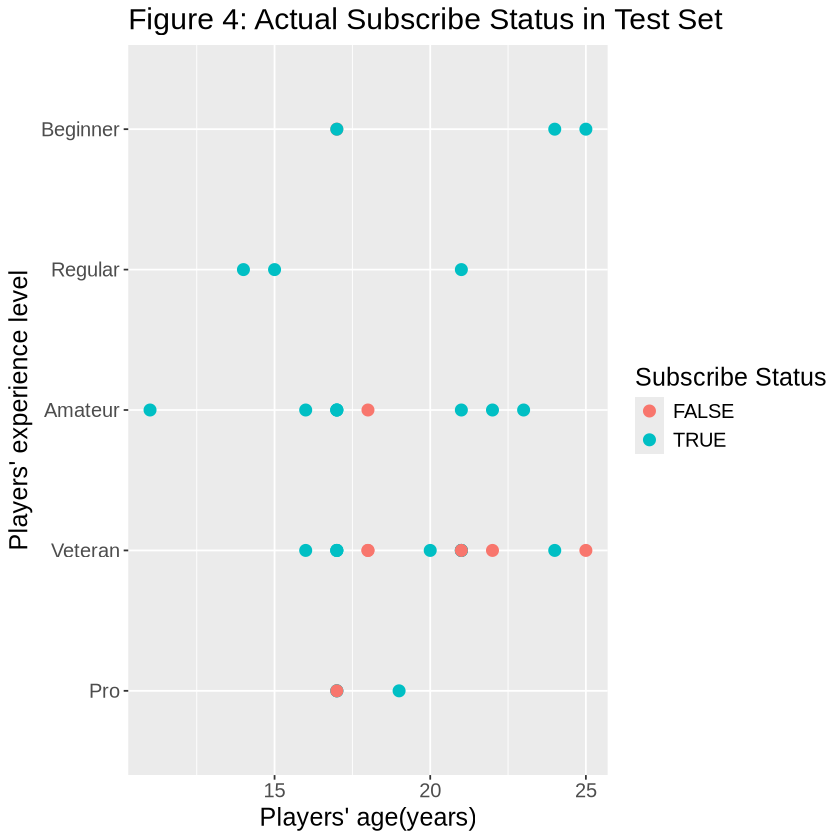

In [24]:
actual_subscribe <- ggplot(players_test, aes(x = Age, y = experience, color = subscribe)) +
  geom_point(size = 3) +
  labs(
    x = "Players' age(years)",
    y = "Players' experience level",
    title = "Figure 4: Actual Subscribe Status in Test Set",
    color = "Subscribe Status") +
    theme(text = element_text(size = 15))
actual_subscribe

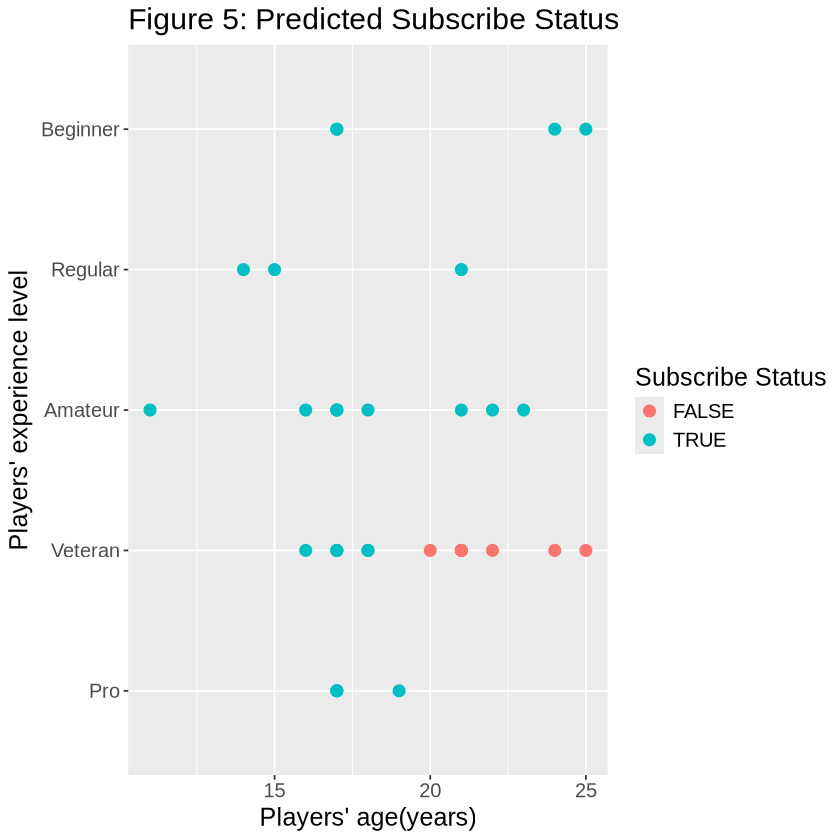

In [25]:
predicted_subscribe <- players_predictions |>
  ggplot(aes(x = Age, y = experience, color = .pred_class)) +
  geom_point(size = 3) +
  labs(
    x = "Players' age(years)",
    y = "Players' experience level",
    title = "Figure 5: Predicted Subscribe Status",
    color = "Subscribe Status"
  ) +
  theme(text = element_text(size = 15))
predicted_subscribe

## Discussion


## References 
Pacific Laboratory of Artificial Intelligence. (2024). PLAICraft. Plaicraft.ai. https://plaicraft.ai/ 
https://www.geeksforgeeks.org/r-language/encoding-categorical-data-in-r/